In [3]:
# Imports modules
import numpy as np
from keras import Sequential
from keras.layers import LSTM, Dense, InputLayer, BatchNormalization
import pandas as pd
from matplotlib import pyplot as plt
from utils import format_ppm_x

import tensorflow as tf

from sklearn.model_selection import train_test_split as tts

from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.seasonal import MSTL

In [4]:
batch_size = 5
num_features = ()
num_prev_vals = 8

In [5]:
data = format_ppm_x(pd.read_csv('../data/ppm.csv'), num_prev_vals)

# X = np.array(data.iloc[:, data.columns != 0]).reshape(num_prev_vals*(63-num_prev_vals), 1)
X = data.iloc[:, data.columns != 0]

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

Y = data[0]

checkpoint 1


In [6]:
def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(num_prev_vals,1)))
    # model.add(LSTM(128, activation='relu', dropout=0.05, return_sequences=True))
    model.add(LSTM(64, activation='relu', dropout=0.05, return_sequences=True))
    model.add(LSTM(16, activation='relu', dropout=0.05, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='relu'))
    return model

In [7]:
model = create_model()

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.3,
    momentum=0.6,
    nesterov=True,
)

model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

2022-11-14 12:58:46.155845: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
decomp = MSTL(Y, periods=(12))

res = decomp.fit()

In [17]:
len(res)

TypeError: object of type 'DecomposeResult' has no len()

In [145]:
X_train, X_test, Y_train, Y_test = tts(X, Y)

history = model.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_test, Y_test),
    batch_size=5,
    epochs=300
)

Epoch 1/300
8/8 [==============================] - 2s 56ms/step - loss: 4679.5103 - mae: 4679.5103 - val_loss: nan - val_mae: nan
Epoch 2/300
8/8 [==============================] - 0s 8ms/step - loss: 355.6835 - mae: 355.6835 - val_loss: nan - val_mae: nan
Epoch 3/300
8/8 [==============================] - 0s 7ms/step - loss: 349.7223 - mae: 349.7223 - val_loss: nan - val_mae: nan
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 343.7229 - mae: 343.7229 - val_loss: nan - val_mae: nan
Epoch 5/300
8/8 [==============================] - 0s 7ms/step - loss: 337.7229 - mae: 337.7229 - val_loss: nan - val_mae: nan
Epoch 6/300
8/8 [==============================] - 0s 7ms/step - loss: 331.7229 - mae: 331.7229 - val_loss: nan - val_mae: nan
Epoch 7/300
8/8 [==============================] - 0s 7ms/step - loss: 325.7229 - mae: 325.7229 - val_loss: nan - val_mae: nan
Epoch 8/300
8/8 [==============================] - 0s 7ms/step - loss: 319.7229 - mae: 319.7229 - val_loss: 

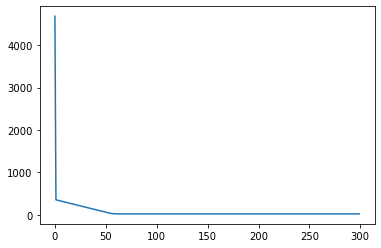

In [146]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])